Ошибка при обработке файла Lab5.zip: cannot identify image file 'D:\\py\\Img\\Lab5.zip'
Ошибка при обработке файла Rory in early 20s - Subete no mono no owari wa sugu ni yattekuru.7 (Slowed   Reverb).mp4: cannot identify image file 'D:\\py\\Img\\Rory in early 20s - Subete no mono no owari wa sugu ni yattekuru.7 (Slowed   Reverb).mp4'


,File Name,Color Mode,File Format,Channels,File Size (MB),Width (px),Height (px),Thumbnail
0,1.jpg,RGB,None,3,0.06,800,800,
1,10.jpg,RGB,None,3,0.12,1280,720,
2,11.webp,RGB,None,3,0.03,360,360,
3,12.webp,RGB,None,3,0.26,1920,1036,
4,13.jpg,RGB,None,3,0.03,624,350,
5,14.jpg,RGB,None,3,0.06,800,500,
6,15.png,RGB,None,3,0.04,340,500,
7,2.webp,RGB,None,3,0.04,1200,690,
8,3.jpg,RGB,None,3,0.02,380,240,
9,4.webp,RGB,None,3,0.05,960,540,

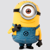
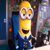
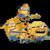
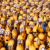
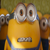
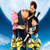
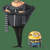
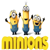
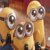
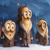
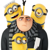
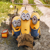
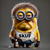
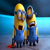
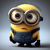

In [13]:
import os
from PIL import Image
import pandas as pd
from IPython.display import display, HTML
import base64
from io import BytesIO

def extract_image_data(directory_path):
    images_list = []
    for file in os.listdir(directory_path):
        file_path = os.path.join(directory_path, file)
        try:
            with Image.open(file_path) as img:
                img = img.convert("RGB")
                image_data = {
                    "File Name": file,
                    "Color Mode": img.mode,
                    "File Format": img.format,
                    "Channels": len(img.getbands()),
                    "File Size (MB)": round(os.path.getsize(file_path) / (1024 * 1024), 2),
                    "Width (px)": img.width,
                    "Height (px)": img.height,
                    "Thumbnail": f'<img src="data:image/png;base64,{image_to_base64(generate_thumbnail(img))}">'
                }
                images_list.append(image_data)
        except Exception as e:
            print(f"Ошибка при обработке файла {file}: {e}")

    image_dataframe = pd.DataFrame(images_list)
    pd.set_option('display.max_colwidth', None)
    display(HTML(image_dataframe.to_html(escape=False)))
    return image_dataframe

def generate_thumbnail(image, new_size=(50, 50)):
    return image.resize(new_size)

def image_to_base64(image):
    img_buffer = BytesIO()
    image.save(img_buffer, format="PNG")
    return base64.b64encode(img_buffer.getvalue()).decode('utf-8')

folder_path = r"D:\py\img"
image_info = extract_image_data(folder_path)

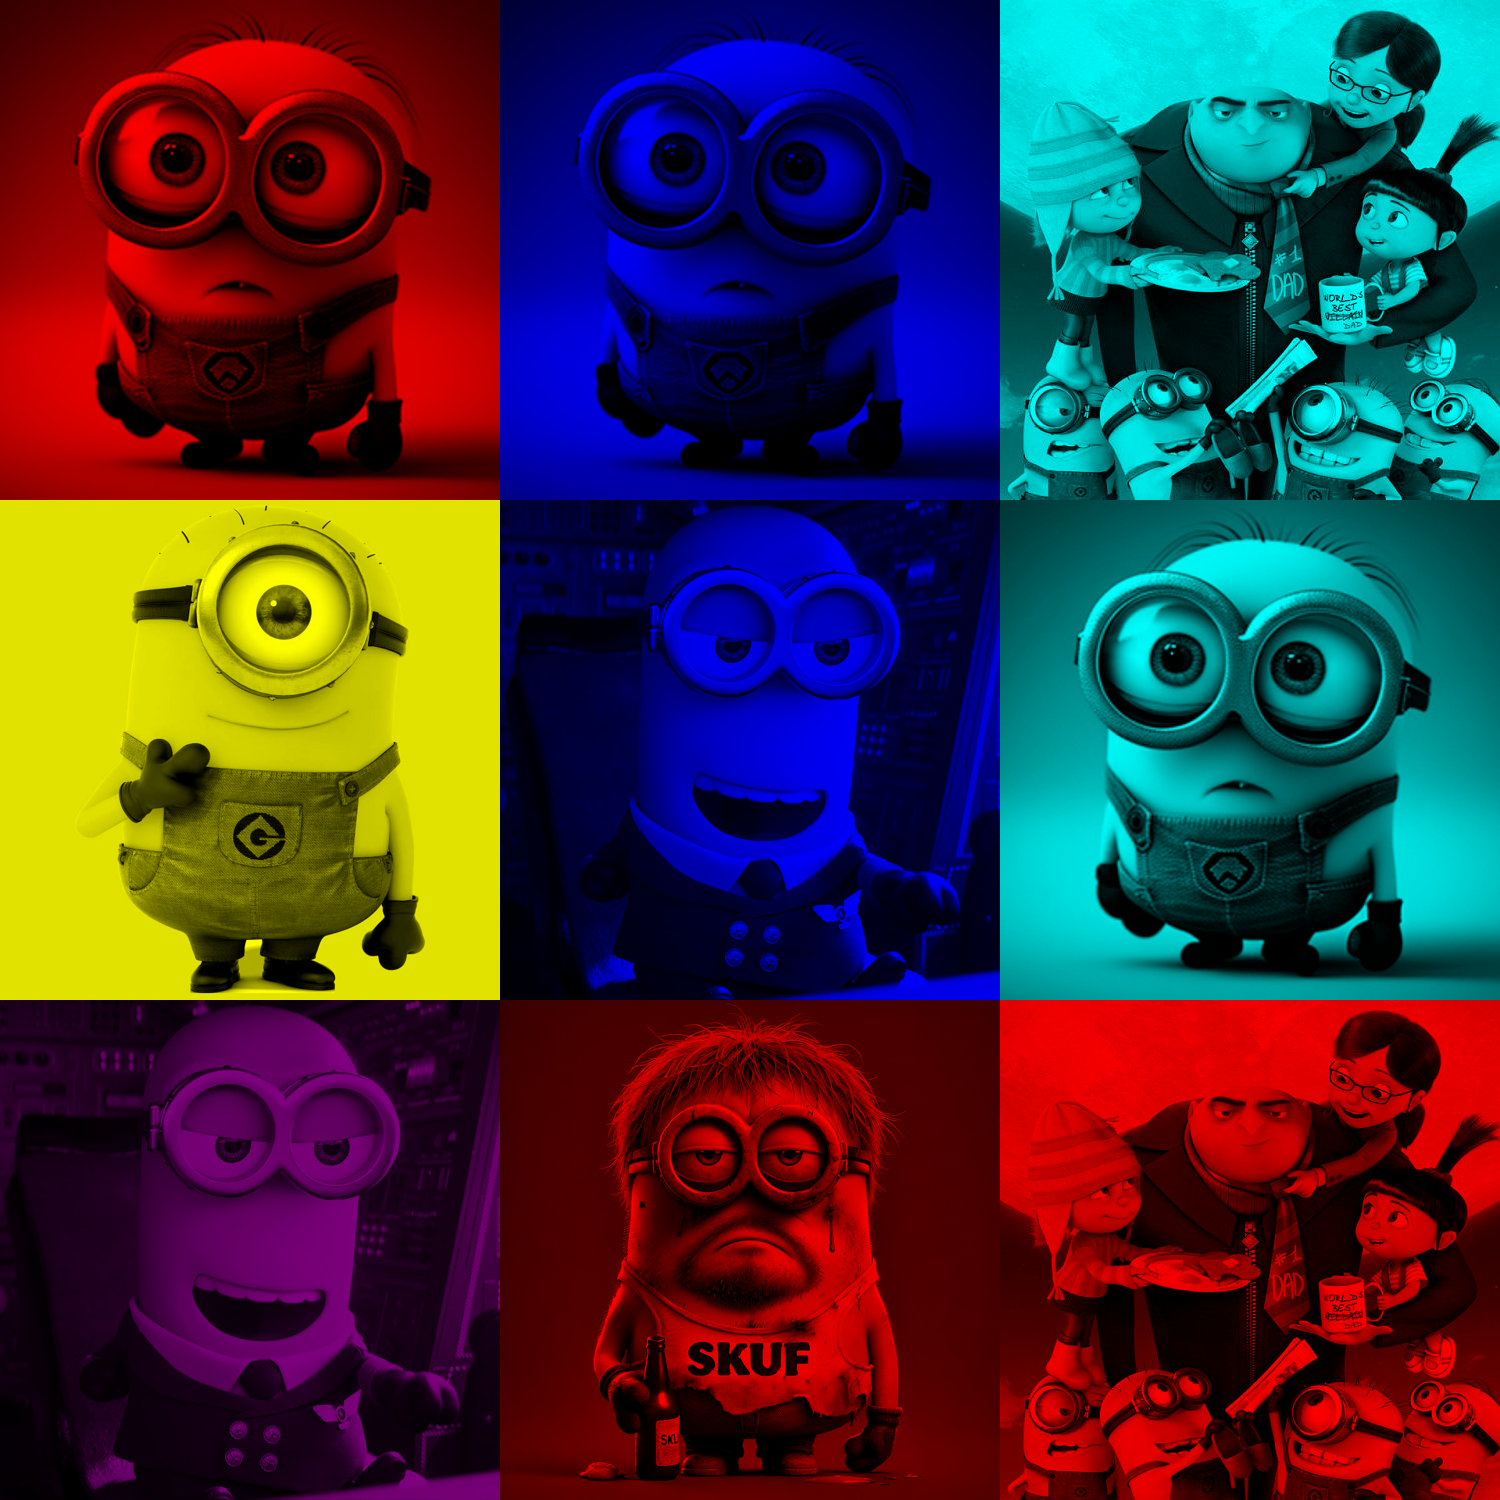

In [14]:
import os
import random
from PIL import Image, ImageEnhance, ImageOps
from IPython.display import display

def create_collage(directory_path, rows, cols):
    available_images = [
        os.path.join(directory_path, file) 
        for file in os.listdir(directory_path) 
        if file.lower().endswith(('png', 'jpg', 'jpeg', 'bmp', 'tiff'))
    ]

    if not available_images:
        raise ValueError("Нет доступных изображений в указанной папке!")

    def modify_image(image_path, target_size=500):
        with Image.open(image_path) as img:
            img = img.convert("RGB")
            
            shortest_side = min(img.size)
            left = (img.width - shortest_side) // 2
            top = (img.height - shortest_side) // 2
            img = img.crop((left, top, left + shortest_side, top + shortest_side))
            
            img = img.resize((target_size, target_size))

            color_filter = random.choice(["red", "green", "blue", "yellow", "purple", "cyan"])
            enhancer = ImageEnhance.Color(img)
            img = enhancer.enhance(0.5)
            img = ImageOps.colorize(img.convert("L"), black="black", white=color_filter)
            return img

    collage_width = cols * 500
    collage_height = rows * 500
    collage_image = Image.new("RGB", (collage_width, collage_height))

    for i in range(rows):
        for j in range(cols):
            img_file = random.choice(available_images)
            modified_image = modify_image(img_file)
            collage_image.paste(modified_image, (j * 500, i * 500))

    display(collage_image)

folder_path = r"D:\py\img"

try:
    create_collage(folder_path, 3, 3)
except Exception as e:
    print(f"Ошибка: {e}")
